In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder, OneHotEncoder

### Reading the data


In [19]:
df = pd.read_csv("House Price India.csv")
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


### Checking for null values

In [31]:
df.isnull().sum()

id                               0
date                             0
number_of_bedrooms               0
number_of_bathrooms              0
living_area                      0
lot_area                         0
number_of_floors                 0
waterfront_present               0
number_of_views                  0
condition_of_the_house           0
grade_of_the_house               0
house_area_excluding_basement    0
basement_area                    0
built_year                       0
renovation_year                  0
postal_code                      0
lattitude                        0
longitude                        0
living_area_renov                0
lot_area_renov                   0
number_of_schools_nearby         0
distance_from_the_airport        0
price                            0
dtype: int64

### Cleaning the column headers and renaming columns

In [20]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [22]:
df.rename(columns = {"area_of_the_house(excluding_basement)":"house_area_excluding_basement"},inplace=True)

In [21]:
df.rename(columns = {"area_of_the_basement":"basement_area"},inplace=True)

In [24]:
df.columns

Index(['id', 'date', 'number_of_bedrooms', 'number_of_bathrooms',
       'living_area', 'lot_area', 'number_of_floors', 'waterfront_present',
       'number_of_views', 'condition_of_the_house', 'grade_of_the_house',
       'house_area_excluding_basement', 'basement_area', 'built_year',
       'renovation_year', 'postal_code', 'lattitude', 'longitude',
       'living_area_renov', 'lot_area_renov', 'number_of_schools_nearby',
       'distance_from_the_airport', 'price'],
      dtype='object')

### Checking and Excluding Outliers


<Axes: >

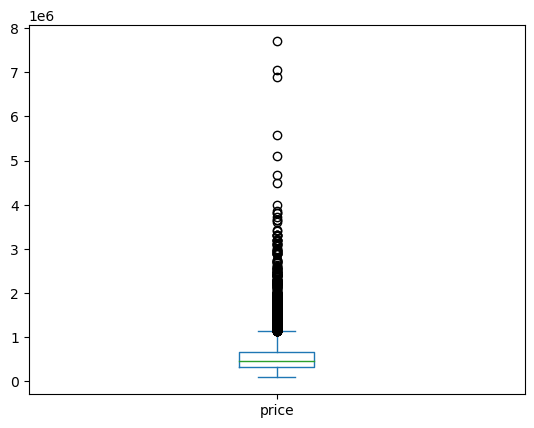

In [25]:
df.price.plot(kind = "box")

In [26]:
q3 = df.price.quantile(0.75)
q1 = df.price.quantile(0.25)
iqr = q3 - q1
max_value = q3 + 1.5 * iqr

max_value

1132500.0

In [27]:
mask_price = df.price <= max_value
df1 = df[mask_price]

df1

,id,date,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,...,built_year,renovation_year,postal_code,lattitude,longitude,living_area_renov,lot_area_renov,number_of_schools_nearby,distance_from_the_airport,price
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
5,6762813157,42491,5,3.25,3660,11995,2.0,0,2,3,...,2006,0,122008,52.7637,-114.050,3320,11241,3,72,785000
6,6762813599,42491,3,1.75,2240,10578,2.0,0,0,5,...,1923,0,122006,52.9254,-114.482,1570,10578,3,71,750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


<Axes: >

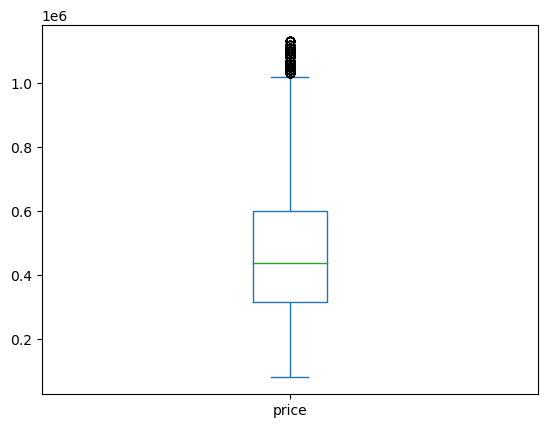

In [28]:
df1.price.plot(kind = "box")

### Splitting the Data

In [32]:
X = df1.drop(columns = ['price'])
y = df1.price

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Baseline Prediction

In [35]:
y_mean = y_train.mean()
y_pred_base = [y_mean] * len(y_train)

In [37]:
mae_baseline = mean_absolute_error(y_pred_base,y_train)
mae_baseline

168996.23629773228

### Training and Fitting the Ridge Regression Model

In [40]:
model = Ridge()

In [41]:
model.fit(X_train,y_train)

Ridge()

In [42]:
y_pred = model.predict(X_train)

In [44]:
mae_train = mean_absolute_error(y_pred, y_train)
mae_train

36855.40777632482

### Testing the Model

In [46]:
model.fit(X_test,y_test)

Ridge()

In [47]:
y_test_pred = model.predict(X_test)

In [ ]:
mae_test = mean_absolute_error(y_test_pred,y_test)
mae_test

### Most Important Features in Prediction

In [55]:
coef = model.coef_
feat = X_train.columns

In [56]:
feat_imp = pd.Series(coef, index = feat).sort_values(ascending=False, key = abs)

<Axes: >

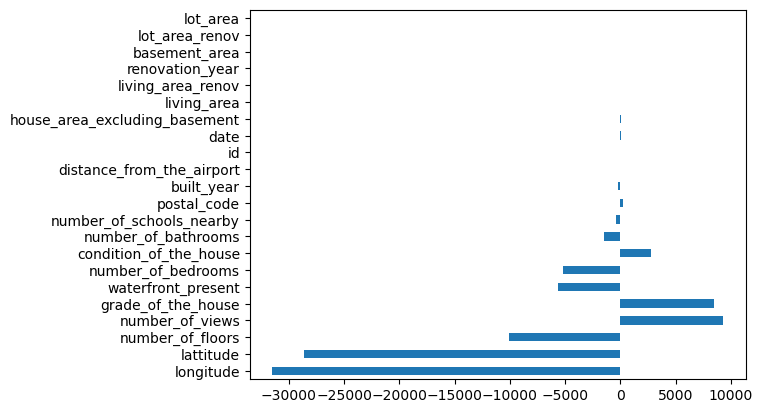

In [57]:
feat_imp.plot(kind="barh")

## Conclusion
- The Ridge Regression model did a better job at predicting the price of a house than The Linear Regression model did.

- 'Longitude' was the most important feature in predicting the price of a house